# Demo: 生成脏标签

In [1]:
from noise.data import NoisyISIC2018
from torchvision import transforms
from torch.utils import data
import torch

In [2]:
BATCH_SIZE = 6
NUM_WORKERS = 0
RANDOM_SEED = 123

In [3]:
# transforms

trans_train = transforms.Compose([
    transforms.CenterCrop((450, 450)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

trans_test = transforms.Compose([
    transforms.CenterCrop((450, 450)),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [4]:
# dataset

train_data = NoisyISIC2018(ann_file='../../Robust-Skin-Lesion-Diagnosis/Data/2018/Train_GroundTruth.csv',
                           img_dir='../../Robust-Skin-Lesion-Diagnosis/Data/2018/ISIC2018_Task3_Training_Input',
                           transform=trans_train, noise_type='asymmetric', noise_rate=.9, random_state=RANDOM_SEED)
test_data = NoisyISIC2018(ann_file='../../Robust-Skin-Lesion-Diagnosis/Data/2018/Test_GroundTruth.csv',
                          img_dir='../../Robust-Skin-Lesion-Diagnosis/Data/2018/ISIC2018_Task3_Training_Input',
                          transform=trans_test, noise_type='symmetric', noise_rate=.4, random_state=RANDOM_SEED)
valid_data = NoisyISIC2018(ann_file='../../Robust-Skin-Lesion-Diagnosis/Data/2018/ISIC2018_Task3_Validation_GroundTruth.csv',
                           img_dir='../../Robust-Skin-Lesion-Diagnosis/Data/2018/ISIC2018_Task3_Validation_Input',
                           transform=trans_test, noise_type='symmetric', noise_rate=0, random_state=RANDOM_SEED)


Actual noise rate: 0.9056
Actual noise rate: 0.3866
Actual noise rate: 0.0000


In [5]:
# dataloader

train_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, drop_last=True, num_workers=NUM_WORKERS)

In [6]:
# display examples

from matplotlib import pyplot as plt
import numpy as np

def draw_image(image, label, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    if isinstance(image, torch.Tensor):
        image = image.numpy().transpose((1, 2, 0))
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.axis("off")
    ax.set_title(label)
    return ax


def draw_samples(images, labels, nrows=2, ncols=3, title=None):
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*3, nrows*3), facecolor='w', dpi=100)

    for (ax, image, label) in zip(axes.flat, images, labels):
        ax = draw_image(image, label, ax)

    fig.suptitle(title)
    
    return fig

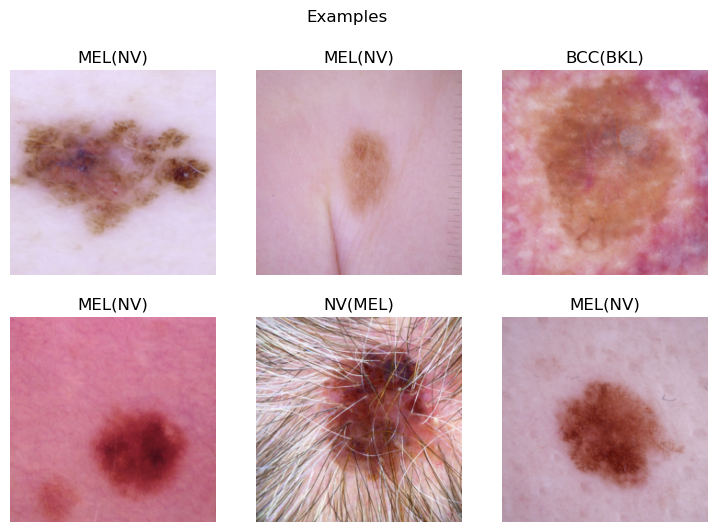

In [7]:
x, y, noisy_y = next(iter(train_loader))
y = train_data.to_names(y)
noisy_y = train_data.to_names(noisy_y)
fig = draw_samples(x, ['{}({})'.format(noisy_label, label) for label, noisy_label in zip(y, noisy_y)], title="Examples")